In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the csv file
file_name = "parkingData.csv"
dataFrame = pd.read_csv(file_name)
print(dataFrame.columns)

Index(['Time Stamp', 'Number of cars'], dtype='object')


In [3]:
#convert 'Time Stamp' column to datetime
dataFrame['Time Stamp'] = pd.to_datetime(dataFrame['Time Stamp'])

In [4]:
#specify the date of which you want to see the details
dateTime ='2024-07-07'
#filter dataFrame of given date
specific_date_df = dataFrame.loc[dataFrame['Time Stamp'].dt.date == pd.Timestamp(dateTime).date()]

In [5]:
print(specific_date_df)

                    Time Stamp  Number of cars
81  2024-07-07 21:31:28.345327               0
82  2024-07-07 21:31:34.728502               0
83  2024-07-07 21:31:41.095437               0
84  2024-07-07 21:31:47.471133               0
85  2024-07-07 21:31:53.808160               0
..                         ...             ...
204 2024-07-07 21:38:12.271890               0
205 2024-07-07 21:38:14.604914               0
206 2024-07-07 21:38:16.964977               0
207 2024-07-07 21:38:19.305848               0
208 2024-07-07 21:38:21.636146               0

[128 rows x 2 columns]


In [6]:
#resample the data to find mean for required time duration
specific_date_df.set_index('Time Stamp', inplace=True)
resampled_dataFreame = specific_date_df.resample('10S' ).mean()

In [7]:
print(resampled_dataFreame)

                     Number of cars
Time Stamp                         
2024-07-07 21:31:20        0.000000
2024-07-07 21:31:30        0.000000
2024-07-07 21:31:40        0.000000
2024-07-07 21:31:50        0.000000
2024-07-07 21:32:00        0.000000
2024-07-07 21:32:10        0.000000
2024-07-07 21:32:20        0.000000
2024-07-07 21:32:30        0.000000
2024-07-07 21:32:40        0.000000
2024-07-07 21:32:50        0.000000
2024-07-07 21:33:00        0.000000
2024-07-07 21:33:10        0.000000
2024-07-07 21:33:20        0.000000
2024-07-07 21:33:30        0.000000
2024-07-07 21:33:40        0.000000
2024-07-07 21:33:50        0.000000
2024-07-07 21:34:00        0.000000
2024-07-07 21:34:10        0.000000
2024-07-07 21:34:20        0.000000
2024-07-07 21:34:30        0.000000
2024-07-07 21:34:40        0.000000
2024-07-07 21:34:50        0.000000
2024-07-07 21:35:00        0.000000
2024-07-07 21:35:10        0.000000
2024-07-07 21:35:20        0.000000
2024-07-07 21:35:30        0

In [8]:
#rounding the values to avoid floating point values in the graph
resampled_dataFreame = resampled_dataFreame.round(0)

#converting 0s to NaN so that they will not be considered in calculating mean and standard deviation
resampled_dataFreame.replace(0, np.nan, inplace=True)

In [9]:
print(resampled_dataFreame)

                     Number of cars
Time Stamp                         
2024-07-07 21:31:20             NaN
2024-07-07 21:31:30             NaN
2024-07-07 21:31:40             NaN
2024-07-07 21:31:50             NaN
2024-07-07 21:32:00             NaN
2024-07-07 21:32:10             NaN
2024-07-07 21:32:20             NaN
2024-07-07 21:32:30             NaN
2024-07-07 21:32:40             NaN
2024-07-07 21:32:50             NaN
2024-07-07 21:33:00             NaN
2024-07-07 21:33:10             NaN
2024-07-07 21:33:20             NaN
2024-07-07 21:33:30             NaN
2024-07-07 21:33:40             NaN
2024-07-07 21:33:50             NaN
2024-07-07 21:34:00             NaN
2024-07-07 21:34:10             NaN
2024-07-07 21:34:20             NaN
2024-07-07 21:34:30             NaN
2024-07-07 21:34:40             NaN
2024-07-07 21:34:50             NaN
2024-07-07 21:35:00             NaN
2024-07-07 21:35:10             NaN
2024-07-07 21:35:20             NaN
2024-07-07 21:35:30         

In [10]:
#find mean and standard deviations to calculate min and max number of cars for which the parking-lot is occupied maximum time
mean_cars = resampled_dataFreame['Number of cars'].mean(skipna=True)
std_cars = resampled_dataFreame['Number of cars'].std(skipna=True)

In [11]:
threshold = 1  # value to change sensitivity

#max and min range are (mean + (threshold * std)) and (mean - (threshold * std)) respectively
peak_hours = resampled_dataFreame[resampled_dataFreame['Number of cars'] > (mean_cars + threshold * std_cars)]
min_hours = resampled_dataFreame[resampled_dataFreame['Number of cars'] < (mean_cars - threshold * std_cars)]

#print the Peak and Minimum hour
print("Peak Hours:\n", peak_hours)
print("Minimum Hours:\n", min_hours)

Peak Hours:
                      Number of cars
Time Stamp                         
2024-07-07 21:37:30             7.0
2024-07-07 21:37:40             7.0
Minimum Hours:
                      Number of cars
Time Stamp                         
2024-07-07 21:36:50             1.0
2024-07-07 21:37:00             2.0


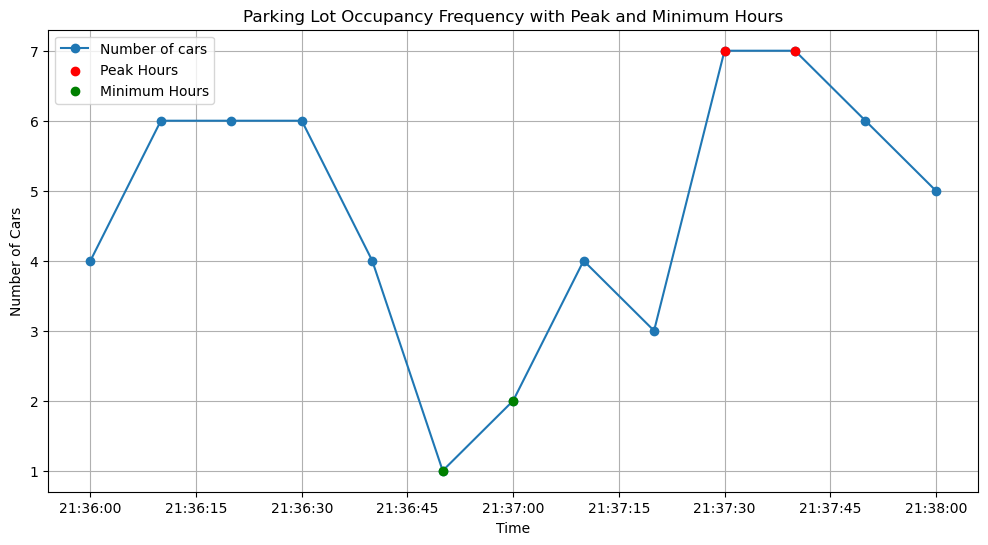

In [12]:
number_of_cars_column = 'Number of cars'
peak_hours_column = 'Number of cars'
min_hours_column = 'Number of cars'

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(resampled_dataFreame.index, resampled_dataFreame[number_of_cars_column], marker='o', label=number_of_cars_column)
plt.scatter(peak_hours.index, peak_hours[peak_hours_column], color='r', label='Peak Hours', zorder=5)
plt.scatter(min_hours.index, min_hours[min_hours_column], color='g', label='Minimum Hours', zorder=5)
plt.title('Parking Lot Occupancy Frequency with Peak and Minimum Hours')
plt.xlabel('Time')
plt.ylabel('Number of Cars')
plt.legend()
plt.grid(True)
plt.show()